# Importing Libraries 

In [1668]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data information 

In [1669]:
df = pd.read_excel('insight_002.xlsx')

In [1670]:
df.shape

(291, 33)

In [1671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                  --------------  -----         
 0   Post ID                                                                                                                                                                                                 291 non-null    object        
 1   Post Message                                                                                                                                                                          

In [1672]:
df.head()

,Post ID,Post Message,Type,Countries,Languages,Posted,Audience Targeting,"Lifetime: The number of people who had your Page's post enter their screen. Posts include statuses, photos, links, videos and more. (Unique Users)",Lifetime: The number of people who had your Page's post enter their screen through unpaid distribution. (Unique Users),Lifetime: The number of people who had your Page's post enter their screen through paid distribution such as an ad. (Unique Users),...,Lifetime: Number of times your video was viewed to 95% of its length without any paid promotion. (Unique Users),Lifetime: Number of times your video was viewed to 95% of its length without any paid promotion. (Total Count),Lifetime: Number of times your video was viewed to 95% of its length after paid promotion. (Unique Users),Lifetime: Number of times your video was viewed to 95% of its length after paid promotion. (Total Count),Lifetime: Number of times your video was viewed for more than 3 seconds without any paid promotion. (Unique Users),Lifetime: Number of times your video was viewed for more than 3 seconds without any paid promotion. (Total Count),Lifetime: Number of times your video was viewed more than 3 seconds after paid promotion. (Unique Users),Lifetime: Number of times your video was viewed more than 3 seconds after paid promotion. (Total Count),Lifetime: Average time video viewed (Total Count),Lifetime: Length of a video post (Total Count)
0,1277547548992987_1741796732568064,Congratulations to the winners of the first on...,Photo,NaN,NaN,2018-06-22 07:58:04,,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1277547548992987_1731769263570811,May your Eid celebrations be as charming as th...,Video,NaN,NaN,2018-06-15 13:43:23,,1556,1556,0,...,72,93,0,0,389,500,0,0,5035,24355
2,1277547548992987_1731343926946678,Wishing everyone a very happy Eid al-Fitr. As ...,Photo,NaN,NaN,2018-06-15 06:57:45,,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,1277547548992987_1727479250666479,What's trending this eid? 🤔,Photo,NaN,NaN,2018-06-12 11:33:50,,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1277547548992987_1725257400888664,Hey IDCians! We are here with our first online...,Photo,NaN,NaN,2018-06-10 08:50:56,,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [1673]:
print(df.isnull().sum())

Post ID                                                                                                                                                                                                     0
Post Message                                                                                                                                                                                               18
Type                                                                                                                                                                                                        2
Countries                                                                                                                                                                                                 291
Languages                                                                                                                                                                       

# Data Cleaning 

In [1674]:
df.dropna(axis="index",how="all", inplace = True)

In [1675]:
df.dropna(axis="columns",how="all", inplace =True)

In [1676]:
df.shape 

(291, 31)

In [1677]:
df["Type"].unique()

array(['Photo', 'Video', 'Link', 'Status', 'SharedVideo', nan],
      dtype=object)

In [1678]:
df.drop(columns=df.columns[((df==0).mean()==1)],axis=1, inplace =True)

In [1679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 23 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                  --------------  -----         
 0   Post ID                                                                                                                                                                                                 291 non-null    object        
 1   Post Message                                                                                                                                                                          

In [1680]:
df.shape

(291, 23)

In [1681]:
df.isnull().sum()

Post ID                                                                                                                                                                                                    0
Post Message                                                                                                                                                                                              18
Type                                                                                                                                                                                                       2
Posted                                                                                                                                                                                                     0
Audience Targeting                                                                                                                                                                  

In [1682]:
df = df.drop(['Post ID','Audience Targeting'], axis=1)

In [1683]:
df.shape

(291, 21)

In [1684]:
print(df.isnull().sum())

Post Message                                                                                                                                                                                              18
Type                                                                                                                                                                                                       2
Posted                                                                                                                                                                                                     0
Lifetime: The number of people who had your Page's post enter their screen. Posts include statuses, photos, links, videos and more. (Unique Users)                                                         0
Lifetime: The number of people who had your Page's post enter their screen through unpaid distribution. (Unique Users)                                                              

In [1685]:
df["Type"].value_counts()

Photo          186
Status          29
Video           28
Link            26
SharedVideo     20
Name: Type, dtype: int64

# Renaming the Columns 

In [1686]:
df.rename(columns = {"Lifetime: Length of a video post (Total Count)" : "Video Length"}, inplace = True)

In [1687]:
df.rename(columns = {"Lifetime: Average time video viewed (Total Count)" : "Average time video viewed"}, inplace = True)

In [1688]:
df.rename(columns = {"Lifetime: Number of times your video was viewed for more than 3 seconds without any paid promotion. (Total Count)" : "More than 3 sec view in total"}, inplace = True)

In [1689]:
df.rename(columns = {"Lifetime: Number of times your video was viewed for more than 3 seconds without any paid promotion. (Unique Users)" : "More than 3 sec view Unique"}, inplace = True)

In [1690]:
df.rename(columns = {"Lifetime: Number of times your video was viewed to 95% of its length without any paid promotion. (Total Count)" : "95% video view total"}, inplace = True)

In [1691]:
df.rename(columns = {"Lifetime: Number of times your video was viewed to 95% of its length without any paid promotion. (Unique Users)" : "95% video view unique"}, inplace = True)

In [1692]:
df.rename(columns = {"Lifetime: The number of people who have liked your Page and clicked anywhere in your posts. (Unique Users)" : "People who clicked (unique)"}, inplace = True)

In [1693]:
df.rename(columns = {"Lifetime: The number of people who saw your Page post because they've liked your Page (Unique Users)" : "People who saw"}, inplace = True)

In [1694]:
df.rename(columns = {"Lifetime: The number of impressions of your Page post to people who have liked your Page. (Total Count)" : "total impressions"}, inplace = True)

In [1695]:
df.rename(columns = {"Lifetime: The number of times people have given negative feedback to your post. (Total Count)": "Total Negative feedback"}, inplace = True)

In [1696]:
df.rename(columns = {"Lifetime: The number of people who have given negative feedback to your post. (Unique Users)": "Unique Negative feedback"}, inplace = True)

In [1697]:
df.rename(columns = {"Lifetime: The number of clicks anywhere in your post on News Feed from the user that matched the audience targeting on it. (Total Count)": "Total Clicks matched audience"}, inplace = True)

In [1698]:
df.rename(columns = {"Lifetime: The number of people who matched the audience targeting that clicked anywhere in your post on News Feed. (Unique Users)": "Unique Clicks matced audience"}, inplace = True)

In [1699]:
df.rename(columns = {"Lifetime: The number of unique people who engaged in certain ways with your Page post, for example by commenting on, liking, sharing, or clicking upon particular elements of the post. (Unique Users)": "Unique Engagement"}, inplace = True)

In [1700]:
df.rename(columns = {"Lifetime: The number of times your Page's posts entered a person's screen through unpaid distribution. (Total Count)": "Total Organic Reach"}, inplace = True)

In [1701]:
df.rename(columns = {"Lifetime: The number of people who had your Page's post enter their screen through unpaid distribution. (Unique Users)": "Unique Organic Reach"}, inplace = True)

In [1702]:
df.rename(columns = {"Lifetime: The number of people who had your Page's post enter their screen. Posts include statuses, photos, links, videos and more. (Unique Users)": "Unique Reach"}, inplace = True)

In [1703]:
df.rename(columns = {"Lifetime: The number of times your Page's post entered a person's screen. Posts include statuses, photos, links, videos and more. (Total Count)": "Total Reach"}, inplace = True)

In [1704]:
print(df.isnull().sum())

Post Message                     18
Type                              2
Posted                            0
Unique Reach                      0
Unique Organic Reach              0
Total Reach                       0
Total Organic Reach               0
Unique Engagement                 0
Unique Clicks matced audience     0
Total Clicks matched audience     0
Unique Negative feedback          0
Total Negative feedback           0
total impressions                 0
People who saw                    0
People who clicked (unique)       0
95% video view unique             0
95% video view total              0
More than 3 sec view Unique       0
More than 3 sec view in total     0
Average time video viewed         0
Video Length                      0
dtype: int64


In [1705]:
df.describe()

,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,Unique Negative feedback,Total Negative feedback,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,2.910000e+02
mean,1778.371134,1778.371134,2481.728522,2481.745704,156.800687,118.635739,175.924399,0.168385,0.182131,1412.900344,957.934708,107.202749,22.134021,25.398625,134.828179,179.656357,1099.701031,1.314499e+05
std,2532.053355,2532.053355,3813.576638,3813.586249,280.241536,231.673621,386.894561,0.629036,0.678098,1617.419868,918.924067,154.297284,109.412976,127.748483,532.632122,776.136665,8251.705271,1.038465e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,259.000000,259.000000,292.000000,292.000000,5.000000,3.000000,3.000000,0.000000,0.000000,225.500000,194.500000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,820.000000,820.000000,1011.000000,1011.000000,43.000000,31.000000,45.000000,0.000000,0.000000,889.000000,719.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2317.500000,2317.500000,2970.000000,2970.000000,181.000000,124.500000,168.000000,0.000000,0.000000,2018.500000,1481.500000,145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,19865.000000,19865.000000,31586.000000,31586.000000,2521.000000,2264.000000,4419.000000,8.000000,8.000000,8812.000000,4275.000000,1136.000000,1159.000000,1438.000000,5742.000000,8594.000000,135835.000000,1.418091e+07


# Data preparation - Data and Time data

In [1706]:
df["Posted"] = pd.to_datetime(df["Posted"] , format = "%y-%d-%m %I-%p")

In [1707]:
df["Posted"].dt.day_name()

0         Friday
1         Friday
2         Friday
3        Tuesday
4         Sunday
         ...    
286       Friday
287       Friday
288       Friday
289    Wednesday
290    Wednesday
Name: Posted, Length: 291, dtype: object

In [1708]:
df ["Day"] = df["Posted"].dt.day_name()

In [1709]:
df

,Post Message,Type,Posted,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,...,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length,Day
0,Congratulations to the winners of the first on...,Photo,2018-06-22 07:58:04,2,2,2,2,0,0,0,...,2,2,0,0,0,0,0,0,0,Friday
1,May your Eid celebrations be as charming as th...,Video,2018-06-15 13:43:23,1556,1556,3125,3125,148,98,158,...,2119,1001,108,72,93,389,500,5035,24355,Friday
2,Wishing everyone a very happy Eid al-Fitr. As ...,Photo,2018-06-15 06:57:45,2,2,2,2,0,0,0,...,2,2,0,0,0,0,0,0,0,Friday
3,What's trending this eid? 🤔,Photo,2018-06-12 11:33:50,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,Tuesday
4,Hey IDCians! We are here with our first online...,Photo,2018-06-10 08:50:56,2,2,2,2,0,0,0,...,1,1,0,0,0,0,0,0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Hear about the prestigious global finale and t...,Status,2020-10-16 02:05:24,634,634,726,726,4,3,3,...,539,456,4,0,0,0,0,0,0,Friday
287,To know more about RB Global Challenge and How...,SharedVideo,2020-10-09 02:25:41,654,654,758,758,10,7,8,...,590,492,10,0,0,53,54,0,15145,Friday
288,Registration window of RB Global Challenge is ...,SharedVideo,2020-10-02 07:00:42,488,488,563,563,8,5,6,...,400,340,8,0,0,16,16,0,115008,Friday
289,"The Result: Nin presents ""Spill the Ink""!! --...",Photo,2020-09-30 08:30:47,969,969,1148,1148,26,13,17,...,888,719,24,0,0,0,0,0,0,Wednesday


In [1710]:
print(df.columns)

Index(['Post Message', 'Type', 'Posted', 'Unique Reach',
       'Unique Organic Reach', 'Total Reach', 'Total Organic Reach',
       'Unique Engagement', 'Unique Clicks matced audience',
       'Total Clicks matched audience', 'Unique Negative feedback',
       'Total Negative feedback', 'total impressions', 'People who saw',
       'People who clicked (unique)', '95% video view unique',
       '95% video view total', 'More than 3 sec view Unique',
       'More than 3 sec view in total', 'Average time video viewed',
       'Video Length', 'Day'],
      dtype='object')


In [1711]:
df.sort_values(by = "Posted", ascending = True, inplace = True)

# Handling Type Missing Values

In [1712]:
print(df.isnull().sum())

Post Message                     18
Type                              2
Posted                            0
Unique Reach                      0
Unique Organic Reach              0
Total Reach                       0
Total Organic Reach               0
Unique Engagement                 0
Unique Clicks matced audience     0
Total Clicks matched audience     0
Unique Negative feedback          0
Total Negative feedback           0
total impressions                 0
People who saw                    0
People who clicked (unique)       0
95% video view unique             0
95% video view total              0
More than 3 sec view Unique       0
More than 3 sec view in total     0
Average time video viewed         0
Video Length                      0
Day                               0
dtype: int64


In [1713]:
df["Type"].unique()

array(['Photo', 'Video', 'Link', 'SharedVideo', 'Status', nan],
      dtype=object)

In [1714]:
null_mask = df["Type"].isnull()
df[null_mask]

,Post Message,Type,Posted,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,...,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length,Day
82,### AUST IDC Graphic Designer Recruitment ### ...,NaN,2019-02-10 00:00:01,3,3,4,4,0,0,0,...,4,3,0,0,0,0,0,0,0,Sunday
70,We have an immediate need for a Public Relatio...,NaN,2019-02-23 05:52:01,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Saturday


In [1715]:
df.isnull().sum()

Post Message                     18
Type                              2
Posted                            0
Unique Reach                      0
Unique Organic Reach              0
Total Reach                       0
Total Organic Reach               0
Unique Engagement                 0
Unique Clicks matced audience     0
Total Clicks matched audience     0
Unique Negative feedback          0
Total Negative feedback           0
total impressions                 0
People who saw                    0
People who clicked (unique)       0
95% video view unique             0
95% video view total              0
More than 3 sec view Unique       0
More than 3 sec view in total     0
Average time video viewed         0
Video Length                      0
Day                               0
dtype: int64

In [1716]:
df["Type"].fillna("Status", inplace = True)

In [1717]:
df.isnull().sum()

Post Message                     18
Type                              0
Posted                            0
Unique Reach                      0
Unique Organic Reach              0
Total Reach                       0
Total Organic Reach               0
Unique Engagement                 0
Unique Clicks matced audience     0
Total Clicks matched audience     0
Unique Negative feedback          0
Total Negative feedback           0
total impressions                 0
People who saw                    0
People who clicked (unique)       0
95% video view unique             0
95% video view total              0
More than 3 sec view Unique       0
More than 3 sec view in total     0
Average time video viewed         0
Video Length                      0
Day                               0
dtype: int64

In [1718]:
df["Type"].unique()

array(['Photo', 'Video', 'Link', 'SharedVideo', 'Status'], dtype=object)

In [1719]:
null_mask2 = df["Post Message"].isnull()
df[null_mask2]

,Post Message,Type,Posted,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,...,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length,Day
21,NaN,Photo,2018-01-20 08:44:59,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,Saturday
39,NaN,Photo,2018-10-18 02:59:34,3,3,3,3,0,0,0,...,2,2,0,0,0,0,0,0,0,Thursday
78,NaN,Photo,2019-02-17 09:24:45,2,2,2,2,0,0,0,...,2,2,0,0,0,0,0,0,0,Sunday
58,NaN,Status,2019-03-28 00:36:23,3,3,4,4,0,0,0,...,4,3,0,0,0,0,0,0,0,Thursday
54,NaN,Photo,2019-05-06 10:12:33,3192,3192,4786,4786,237,54,79,...,3551,2294,195,0,0,0,0,0,0,Monday
142,NaN,Link,2020-03-05 07:58:20,275,275,285,285,41,40,52,...,247,238,40,0,0,13,14,0,88351,Thursday
128,NaN,Photo,2020-03-09 06:41:20,287,287,317,317,9,9,9,...,268,245,8,0,0,0,0,0,0,Monday
125,NaN,Photo,2020-03-10 01:36:43,330,330,369,369,15,14,19,...,308,275,14,0,0,0,0,0,0,Tuesday
218,NaN,Status,2020-06-23 06:03:36,658,658,852,852,20,11,12,...,756,584,20,0,0,0,0,0,0,Tuesday
215,NaN,Status,2020-06-28 04:01:33,734,734,926,926,25,16,19,...,842,668,25,0,0,0,0,0,0,Sunday


In [1720]:
df["Post Message"].fillna("No Caption", inplace = True)

In [1721]:
df.isnull().sum()

Post Message                     0
Type                             0
Posted                           0
Unique Reach                     0
Unique Organic Reach             0
Total Reach                      0
Total Organic Reach              0
Unique Engagement                0
Unique Clicks matced audience    0
Total Clicks matched audience    0
Unique Negative feedback         0
Total Negative feedback          0
total impressions                0
People who saw                   0
People who clicked (unique)      0
95% video view unique            0
95% video view total             0
More than 3 sec view Unique      0
More than 3 sec view in total    0
Average time video viewed        0
Video Length                     0
Day                              0
dtype: int64

In [1722]:
df.head(20)

,Post Message,Type,Posted,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,...,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length,Day
31,2017. A year in which AUST Innovation and Desi...,Photo,2017-12-31 09:58:18,2,2,2,2,0,0,0,...,2,2,0,0,0,0,0,0,0,Sunday
30,"As we step into a new year, we thought we'd li...",Video,2018-01-01 04:20:56,2294,2294,3715,3715,242,191,302,...,2238,1368,183,48,55,550,672,15184,132073,Monday
29,AUST Innovation and Design club proudly brings...,Link,2018-01-01 10:58:33,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,Monday
28,Poster Maestros commenced with a purpose to se...,Photo,2018-01-03 09:37:45,2,2,2,2,0,0,0,...,2,2,0,0,0,0,0,0,0,Wednesday
27,Don Sumdany sends a message to AUSTIANS welcom...,Video,2018-01-04 22:24:49,3887,3887,9231,9231,348,296,490,...,4572,1700,243,78,84,721,885,8296,75764,Thursday
26,The biggest prize pool in AUST's history ladie...,Photo,2018-01-08 09:51:37,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,Monday
25,Poster Maestros,Photo,2018-01-11 10:20:39,1,1,1,1,1,0,0,...,1,1,0,0,0,0,0,0,0,Thursday
24,Poster Maestros,Photo,2018-01-11 10:39:09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Thursday
23,Poster Maestros,Photo,2018-01-11 10:39:48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Thursday
22,"Seminar on Robotics and Artificial Intelligence""",Photo,2018-01-17 06:46:33,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,Wednesday


# Exploratory Data Analysis(EDA)  and Correlations finding

In [1723]:
df.corr()

,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,Unique Negative feedback,Total Negative feedback,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length
Unique Reach,1.000000,1.000000,0.981601,0.981601,0.882641,0.821390,0.762453,0.282300,0.259817,0.909835,0.888822,0.882466,0.374821,0.376613,0.498431,0.503436,0.313611,0.092060
Unique Organic Reach,1.000000,1.000000,0.981601,0.981601,0.882641,0.821390,0.762453,0.282300,0.259817,0.909835,0.888822,0.882466,0.374821,0.376613,0.498431,0.503436,0.313611,0.092060
Total Reach,0.981601,0.981601,1.000000,1.000000,0.872118,0.813738,0.760049,0.265681,0.243494,0.937582,0.862648,0.871672,0.429660,0.428942,0.527860,0.531186,0.310595,0.083097
Total Organic Reach,0.981601,0.981601,1.000000,1.000000,0.872118,0.813738,0.760048,0.265679,0.243492,0.937584,0.862651,0.871672,0.429663,0.428944,0.527866,0.531190,0.310596,0.083096
Unique Engagement,0.882641,0.882641,0.872118,0.872118,1.000000,0.979857,0.954847,0.464318,0.433242,0.807865,0.785014,0.966099,0.358376,0.355986,0.630175,0.635128,0.547500,0.206339
Unique Clicks matced audience,0.821390,0.821390,0.813738,0.813738,0.979857,1.000000,0.984577,0.482226,0.451560,0.751028,0.719886,0.940019,0.363528,0.361488,0.674961,0.681405,0.595942,0.235332
Total Clicks matched audience,0.762453,0.762453,0.760049,0.760048,0.954847,0.984577,1.000000,0.551361,0.514338,0.702370,0.665612,0.903104,0.328418,0.327175,0.700015,0.710260,0.686827,0.286527
Unique Negative feedback,0.282300,0.282300,0.265681,0.265679,0.464318,0.482226,0.551361,1.000000,0.962623,0.256122,0.277802,0.395640,-0.028436,-0.027314,0.436446,0.451966,0.696829,0.408839
Total Negative feedback,0.259817,0.259817,0.243494,0.243492,0.433242,0.451560,0.514338,0.962623,1.000000,0.243012,0.268611,0.377402,-0.030494,-0.029382,0.400760,0.415343,0.643701,0.377198
total impressions,0.909835,0.909835,0.937582,0.937584,0.807865,0.751028,0.702370,0.256122,0.243012,1.000000,0.948412,0.873316,0.428636,0.423947,0.505752,0.504137,0.283678,0.069463


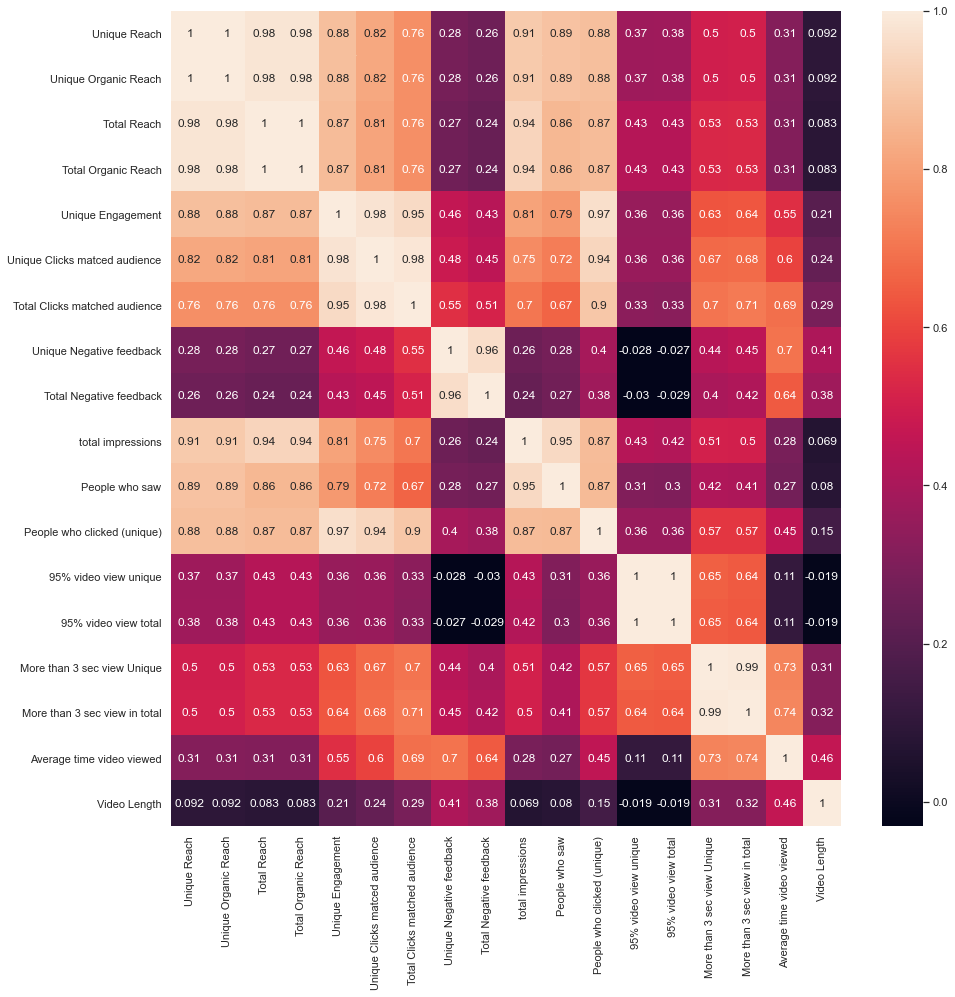

In [1724]:
import seaborn as sn
plt.figure(figsize=(15, 15))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [1725]:
df.columns

Index(['Post Message', 'Type', 'Posted', 'Unique Reach',
       'Unique Organic Reach', 'Total Reach', 'Total Organic Reach',
       'Unique Engagement', 'Unique Clicks matced audience',
       'Total Clicks matched audience', 'Unique Negative feedback',
       'Total Negative feedback', 'total impressions', 'People who saw',
       'People who clicked (unique)', '95% video view unique',
       '95% video view total', 'More than 3 sec view Unique',
       'More than 3 sec view in total', 'Average time video viewed',
       'Video Length', 'Day'],
      dtype='object')

# User Reach Analysis

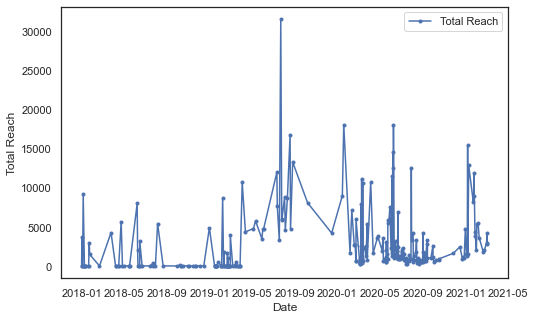

In [1726]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(df["Posted"], df["Total Reach"], 'b.-', label='Total Reach')


plt.xlabel('Date')
plt.ylabel('Total Reach')

plt.legend()

plt.show()

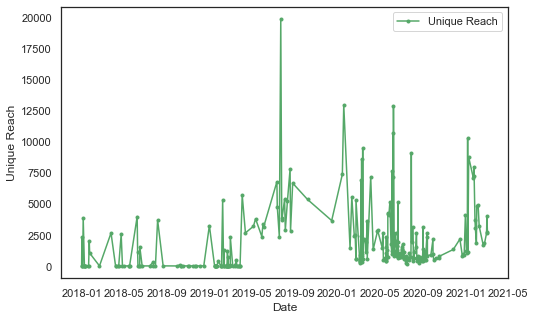

In [1727]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(df["Posted"], df["Unique Reach"], 'g.-', label='Unique Reach')


plt.xlabel('Date')
plt.ylabel('Unique Reach')

plt.legend()

plt.show()

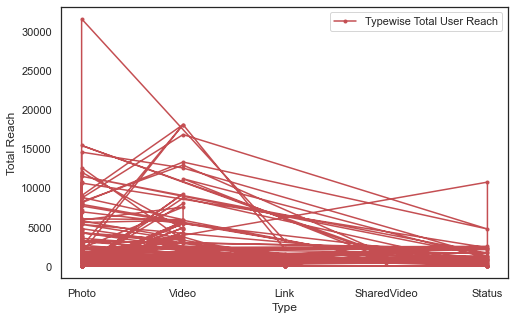

In [1728]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(df["Type"], df["Total Reach"], 'r.-', label='Typewise Total User Reach')


plt.xlabel('Type')
plt.ylabel('Total Reach')

plt.legend()

plt.show()

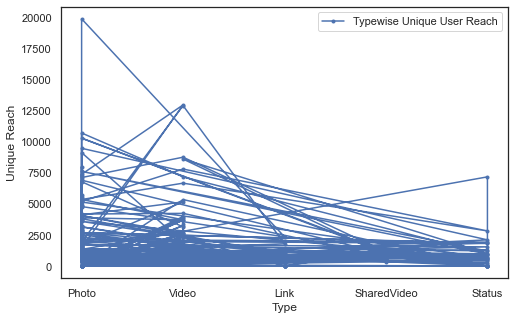

In [1729]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(df["Type"], df["Unique Reach"], 'b.-', label='Typewise Unique User Reach')


plt.xlabel('Type')
plt.ylabel('Unique Reach')

plt.legend()

plt.show()

# User Engagements Analysis

In [1730]:
df.columns

Index(['Post Message', 'Type', 'Posted', 'Unique Reach',
       'Unique Organic Reach', 'Total Reach', 'Total Organic Reach',
       'Unique Engagement', 'Unique Clicks matced audience',
       'Total Clicks matched audience', 'Unique Negative feedback',
       'Total Negative feedback', 'total impressions', 'People who saw',
       'People who clicked (unique)', '95% video view unique',
       '95% video view total', 'More than 3 sec view Unique',
       'More than 3 sec view in total', 'Average time video viewed',
       'Video Length', 'Day'],
      dtype='object')

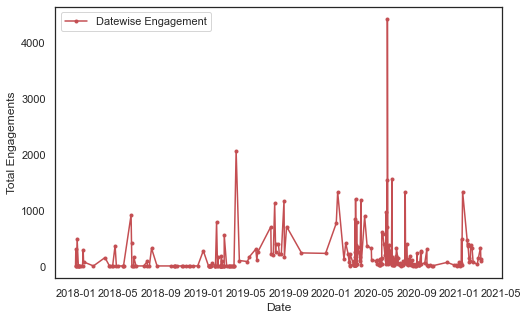

In [1731]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(df["Posted"], df["Total Clicks matched audience"], 'r.-', label='Datewise Engagement')


plt.xlabel('Date')
plt.ylabel('Total Engagements')

plt.legend()

plt.show()

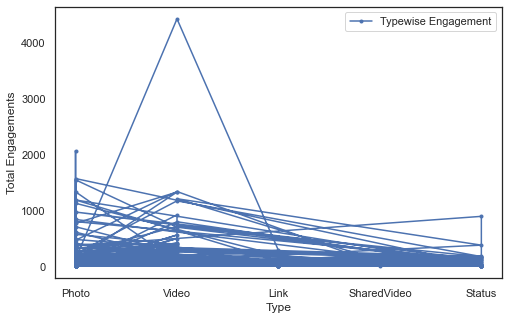

In [1732]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(df["Type"], df["Total Clicks matched audience"], 'b.-', label='Typewise Engagement')


plt.xlabel('Type')
plt.ylabel('Total Engagements')

plt.legend()

plt.show()

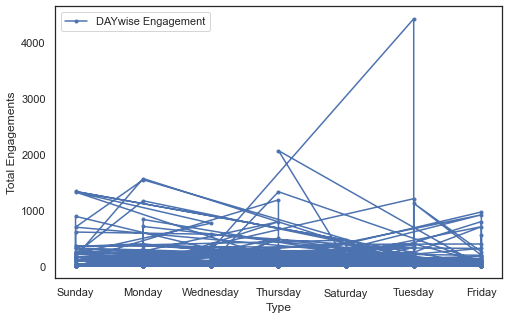

In [1733]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(df["Day"], df["Total Clicks matched audience"], 'b.-', label='DAYwise Engagement')


plt.xlabel('Type')
plt.ylabel('Total Engagements')

plt.legend()

plt.show()

C:\Users\nafem\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafem\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafem\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafem\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafem\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.4% of the points

<AxesSubplot:xlabel='Day', ylabel='Total Clicks matched audience'>

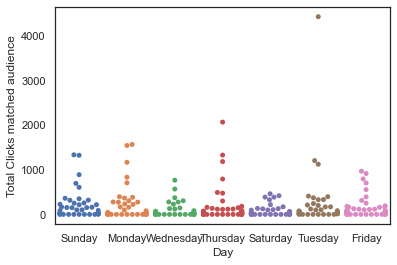

In [1734]:
sns.swarmplot(x="Day", y= "Total Clicks matched audience", data = df)
             

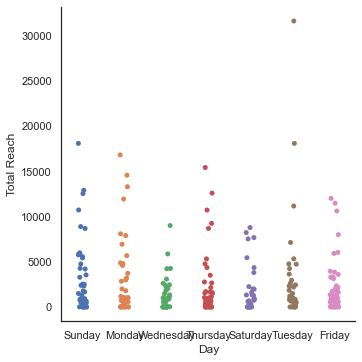

In [1735]:
sns.catplot(x="Day", y="Total Reach", data=df)

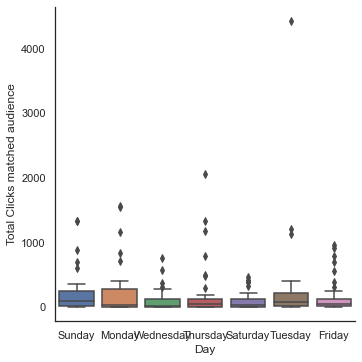

In [1736]:
sns.catplot(x="Day", y="Total Clicks matched audience", kind="box", data=df)

# Video Data Analysis

In [1737]:
df["Type"].unique()

array(['Photo', 'Video', 'Link', 'SharedVideo', 'Status'], dtype=object)

In [1738]:
filt1 = (df["Type"] == "Video")

In [1739]:
video = df.loc[filt1]

In [1740]:
video.head(5)

,Post Message,Type,Posted,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,...,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length,Day
30,"As we step into a new year, we thought we'd li...",Video,2018-01-01 04:20:56,2294,2294,3715,3715,242,191,302,...,2238,1368,183,48,55,550,672,15184,132073,Monday
27,Don Sumdany sends a message to AUSTIANS welcom...,Video,2018-01-04 22:24:49,3887,3887,9231,9231,348,296,490,...,4572,1700,243,78,84,721,885,8296,75764,Thursday
20,"Dear roborace enthusiasts,we've seen your line...",Video,2018-01-22 06:16:19,1980,1980,2986,2986,238,194,277,...,2319,1493,205,58,64,601,659,13349,75973,Monday
17,আমার স্বাধীনতা আমার অহংকার। অস্ট ইনোভেশন অ্যা...,Video,2018-03-25 11:11:42,2648,2648,4264,4264,162,107,149,...,2718,1483,130,36,41,506,589,4825,83915,Sunday
12,"People of AUST,the moment you have been waitin...",Video,2018-04-23 09:55:28,2542,2542,5672,5672,342,263,364,...,3227,1408,218,133,158,138,163,2825,1600,Monday


In [1741]:
video.columns

Index(['Post Message', 'Type', 'Posted', 'Unique Reach',
       'Unique Organic Reach', 'Total Reach', 'Total Organic Reach',
       'Unique Engagement', 'Unique Clicks matced audience',
       'Total Clicks matched audience', 'Unique Negative feedback',
       'Total Negative feedback', 'total impressions', 'People who saw',
       'People who clicked (unique)', '95% video view unique',
       '95% video view total', 'More than 3 sec view Unique',
       'More than 3 sec view in total', 'Average time video viewed',
       'Video Length', 'Day'],
      dtype='object')

In [1742]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 30 to 262
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Post Message                   28 non-null     object        
 1   Type                           28 non-null     object        
 2   Posted                         28 non-null     datetime64[ns]
 3   Unique Reach                   28 non-null     int64         
 4   Unique Organic Reach           28 non-null     int64         
 5   Total Reach                    28 non-null     int64         
 6   Total Organic Reach            28 non-null     int64         
 7   Unique Engagement              28 non-null     int64         
 8   Unique Clicks matced audience  28 non-null     int64         
 9   Total Clicks matched audience  28 non-null     int64         
 10  Unique Negative feedback       28 non-null     int64         
 11  Total Negative feed

In [1743]:
video.corr()

,Unique Reach,Unique Organic Reach,Total Reach,Total Organic Reach,Unique Engagement,Unique Clicks matced audience,Total Clicks matched audience,Unique Negative feedback,Total Negative feedback,total impressions,People who saw,People who clicked (unique),95% video view unique,95% video view total,More than 3 sec view Unique,More than 3 sec view in total,Average time video viewed,Video Length
Unique Reach,1.000000,1.000000,0.951470,0.951473,0.863719,0.850360,0.793018,0.509108,0.509108,0.811081,0.891600,0.889739,0.523182,0.534152,0.933595,0.939231,0.477470,0.509271
Unique Organic Reach,1.000000,1.000000,0.951470,0.951473,0.863719,0.850360,0.793018,0.509108,0.509108,0.811081,0.891600,0.889739,0.523182,0.534152,0.933595,0.939231,0.477470,0.509271
Total Reach,0.951470,0.951470,1.000000,1.000000,0.802069,0.792014,0.738551,0.433835,0.433835,0.926122,0.871189,0.848528,0.576545,0.580693,0.878171,0.886714,0.395286,0.429434
Total Organic Reach,0.951473,0.951473,1.000000,1.000000,0.802071,0.792012,0.738548,0.433833,0.433833,0.926129,0.871212,0.848529,0.576544,0.580691,0.878183,0.886719,0.395285,0.429433
Unique Engagement,0.863719,0.863719,0.802069,0.802071,1.000000,0.995625,0.983740,0.816961,0.816961,0.644028,0.800189,0.983161,0.285881,0.285855,0.958644,0.955019,0.802397,0.817155
Unique Clicks matced audience,0.850360,0.850360,0.792014,0.792012,0.995625,1.000000,0.986863,0.814079,0.814079,0.621232,0.761964,0.974309,0.260395,0.261206,0.953390,0.951184,0.804284,0.813983
Total Clicks matched audience,0.793018,0.793018,0.738551,0.738548,0.983740,0.986863,1.000000,0.885253,0.885253,0.588311,0.735618,0.958714,0.176003,0.178669,0.922675,0.925032,0.879544,0.888689
Unique Negative feedback,0.509108,0.509108,0.433835,0.433833,0.816961,0.814079,0.885253,1.000000,1.000000,0.320721,0.529020,0.763100,-0.149860,-0.145213,0.704117,0.705095,0.975736,0.985429
Total Negative feedback,0.509108,0.509108,0.433835,0.433833,0.816961,0.814079,0.885253,1.000000,1.000000,0.320721,0.529020,0.763100,-0.149860,-0.145213,0.704117,0.705095,0.975736,0.985429
total impressions,0.811081,0.811081,0.926122,0.926129,0.644028,0.621232,0.588311,0.320721,0.320721,1.000000,0.877866,0.724854,0.530861,0.523586,0.739161,0.748696,0.292010,0.336110


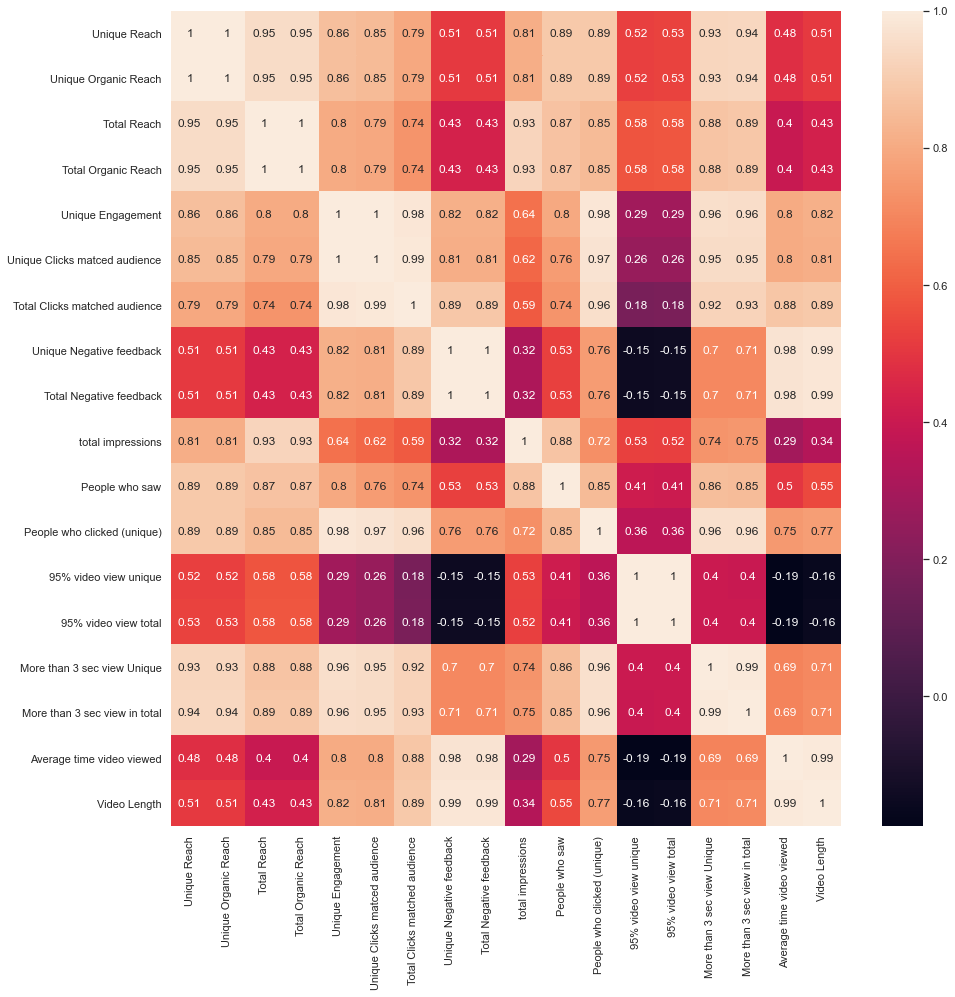

In [1744]:
import seaborn as sn
plt.figure(figsize=(15, 15))
sn.heatmap(video.corr(), annot=True)
plt.show()

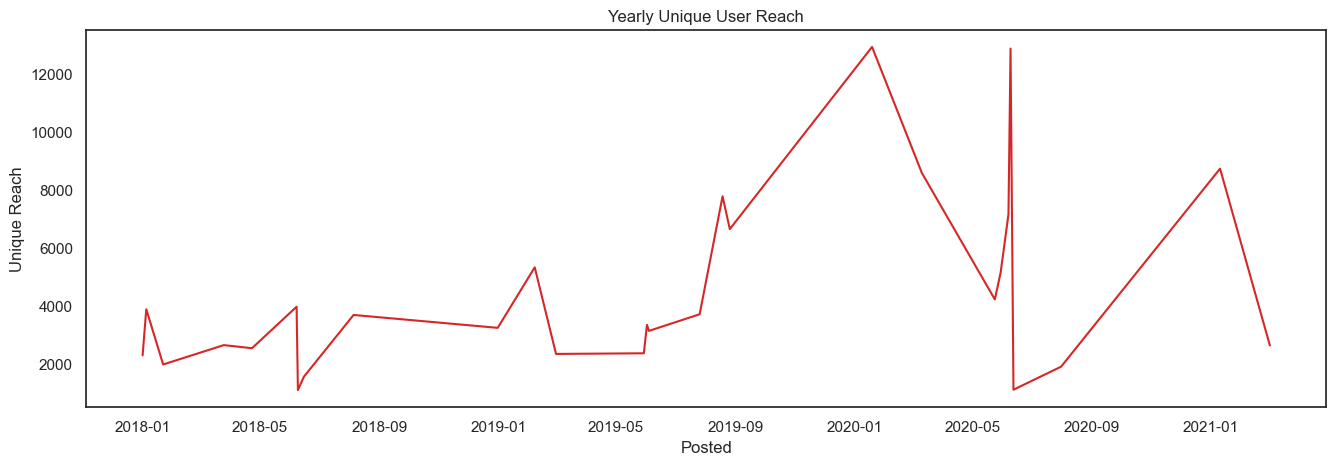

In [1745]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Posted', ylabel='Unique Reach', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=video["Posted"], y=video["Unique Reach"], title='Yearly Unique User Reach') 

In [1746]:
video.columns

Index(['Post Message', 'Type', 'Posted', 'Unique Reach',
       'Unique Organic Reach', 'Total Reach', 'Total Organic Reach',
       'Unique Engagement', 'Unique Clicks matced audience',
       'Total Clicks matched audience', 'Unique Negative feedback',
       'Total Negative feedback', 'total impressions', 'People who saw',
       'People who clicked (unique)', '95% video view unique',
       '95% video view total', 'More than 3 sec view Unique',
       'More than 3 sec view in total', 'Average time video viewed',
       'Video Length', 'Day'],
      dtype='object')

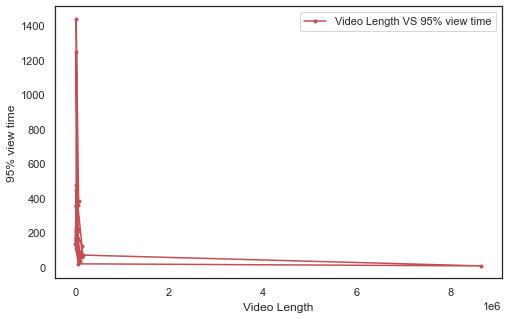

In [1747]:
plt.figure(figsize=(8,5))

plt.title('', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(video["Video Length"], video["95% video view total"], 'r.-', label='Video Length VS 95% view time')


plt.xlabel('Video Length')
plt.ylabel('95% view time')

plt.legend()

plt.show()


# Results and Findings 

1. Total User reach has been dropped in recent years


2. Total Unique reach has also been dropped in recent years


3. Photos and videos have the most total and unique reaches


4. Total Engagement has been dropped in recent years


5. Photos and Videos have the most engagements 


6. Friday has the least amount of reach and engagements


7. Sunday has the most reach and engagements


8. Shorter Videos have the most view time 

